In [1]:
from aqua.diagnostics import sshVariabilityCompute, sshVariabilityPlot

/work/ab0995/a270260/aqua/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
dataset_dict = {"catalog": "climatedt-phase1", "model": "IFS-NEMO", "exp":"historical-1990", "source":"ssh-IFS-NEMO-test"}
dataset_dict_ref = {"catalog": "obs", "model": "AVISO", "exp":"ssh-L4", "source":"ssh-AVISO-test"}

## Regrid data is also possible. Make sure to choose a correct Regridding method in the plotting function
# dataset_dict = {"catalog": "climatedt-phase1", "model": "IFS-NEMO", "exp":"historical-1990", "source":"ssh-IFS-NEMO-test", "regrid":"r025"}
# dataset_dict_ref = {"catalog": "obs", "model": "AVISO", "exp":"ssh-L4", "source":"ssh-AVISO-test", "regrid":"r025"}

In [3]:
startdate="1994-01-01";enddate="1994-01-04"; startdate_ref="1994-01-01"; enddate_ref="1994-01-04";

In [4]:
# Intialize the SSH compute class
ssh_dataset = sshVariabilityCompute(
                    **dataset_dict,
                    var='zos',
                    startdate=startdate,
                    enddate=enddate,)

In [5]:
# Run the compute function and save as NetCDF
ssh_dataset.run()

2025-11-18 02:02:35 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-11-18 02:02:35 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
/work/ab0995/a270260/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:58: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [6]:
# Intialize the SSH compute class for Reference data AVISO
ssh_dataset_ref = sshVariabilityCompute(
                    **dataset_dict_ref,
                    var='zos',
                    startdate=startdate,
                    enddate=enddate,)

In [7]:
# Run the compute function and save as NetCDF
ssh_dataset_ref.run()

2025-11-18 02:02:40 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-11-18 02:02:40 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
/work/ab0995/a270260/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:58: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [8]:
# Initialize the SSH plot class
plot_class = sshVariabilityPlot()

In [9]:
# It is important to choose a correct 'tgt_grid_name' so that the data aligns with land mask
tgt_grid_name = "r1440x721"
# tgt_grid_name = "r1440x720" 

2025-11-18 02:02:43 :: Regridder :: WARNING  -> No cfg_grid_dict dictionary provided, only CDO grid names can be used.
2025-11-18 02:02:43 :: Regridder :: WARNING  -> Weights block not found in the configuration file, using fallback naming scheme.


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxes: title={'center': 'SSH Variability of Sea surface height for IFS-NEMO historical-1990 (1994-01-01 to 1994-01-04) '}, xlabel='Longitude', ylabel='Latitude'>)

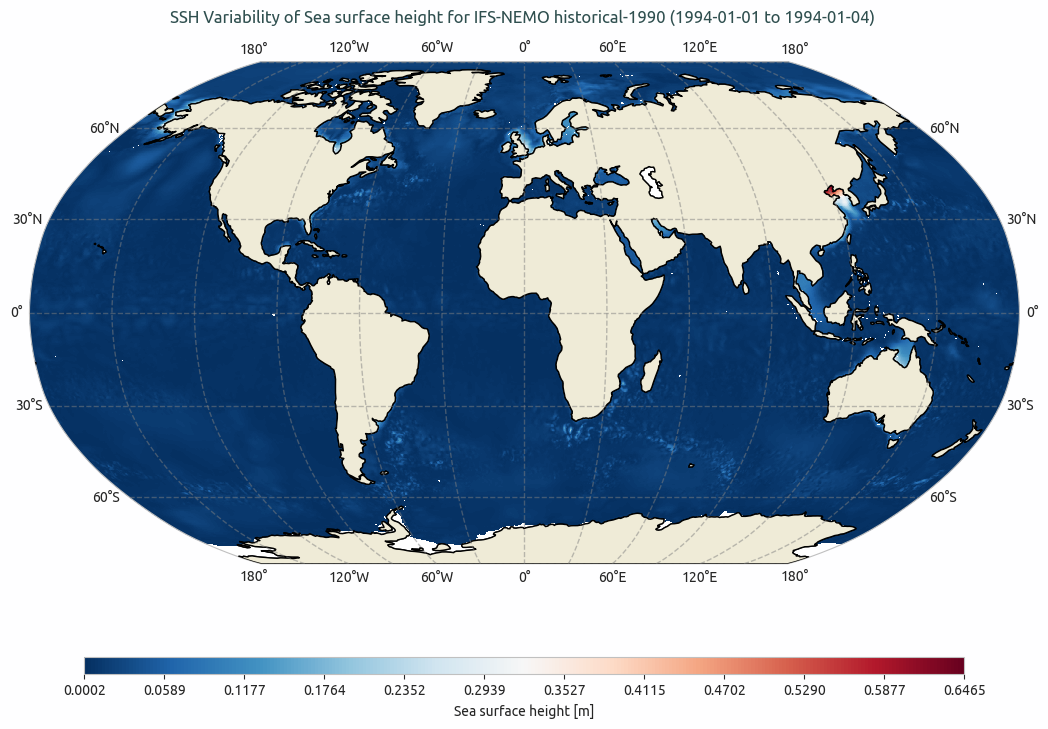

In [10]:
# Plot SSH for model dataset
# It is important to choose a correct 'tgt_grid_name' so that the data aligns with land mask
plot_dataset = {"catalog": "climatedt-phase1", "model": "IFS-NEMO", "exp":"historical-1990", "tgt_grid_name":tgt_grid_name}
plot_class.plot(dataset_std=ssh_dataset.data_std, **plot_dataset, startdate=startdate, enddate=enddate,)

2025-11-18 02:04:01 :: Regridder :: WARNING  -> No cfg_grid_dict dictionary provided, only CDO grid names can be used.
2025-11-18 02:04:01 :: Regridder :: WARNING  -> Weights block not found in the configuration file, using fallback naming scheme.


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxes: title={'center': 'SSH Variability of Absolute dynamic topography for AVISO ssh-L4 (1994-01-01 to 1994-01-04) '}, xlabel='Longitude', ylabel='Latitude'>)

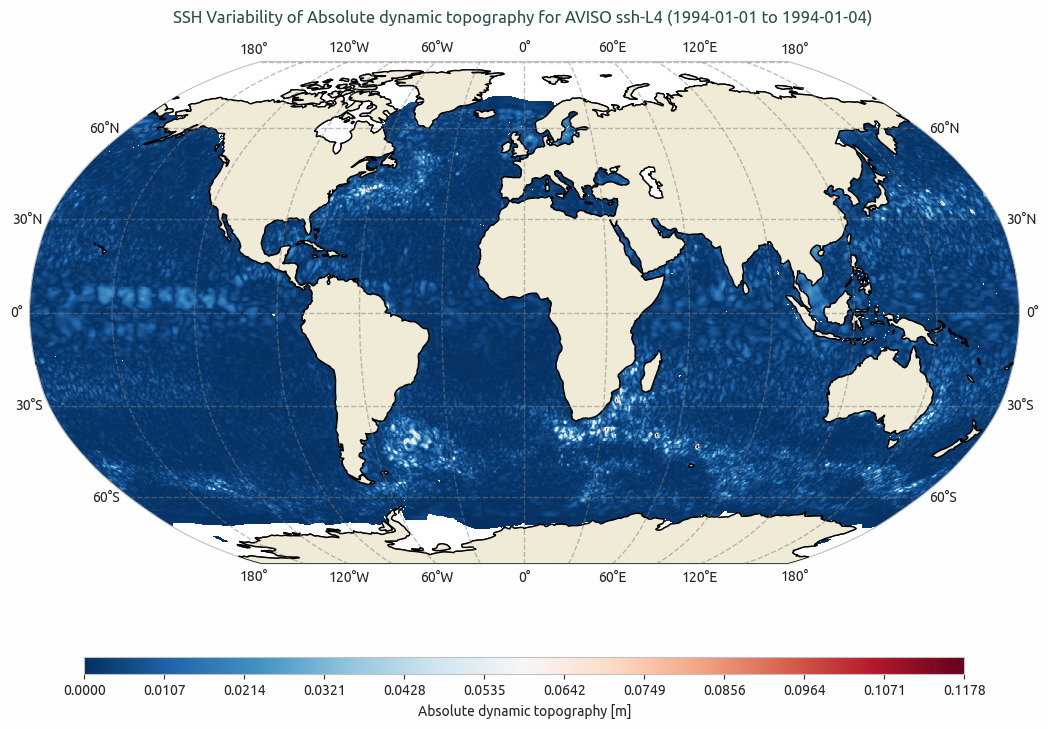

In [11]:
# Plot SSH for reference dataset 
# It is important to choose a correct 'tgt_grid_name' so that the data aligns with land mask
plot_dataset_ref = {"catalog": "obs", "model": "AVISO", "exp":"ssh-L4", "tgt_grid_name":tgt_grid_name,}
plot_class.plot(dataset_std=ssh_dataset_ref.data_std, **plot_dataset_ref, startdate=startdate, enddate=enddate,)

2025-11-18 02:05:16 :: Regridder :: WARNING  -> No cfg_grid_dict dictionary provided, only CDO grid names can be used.
2025-11-18 02:05:16 :: Regridder :: WARNING  -> Weights block not found in the configuration file, using fallback naming scheme.


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxes: title={'center': 'SSH Variability of Sea surface height for IFS-NEMO historical-1990 (1994-01-01 to 1994-01-04) Agulhas '}, xlabel='Longitude', ylabel='Latitude'>)

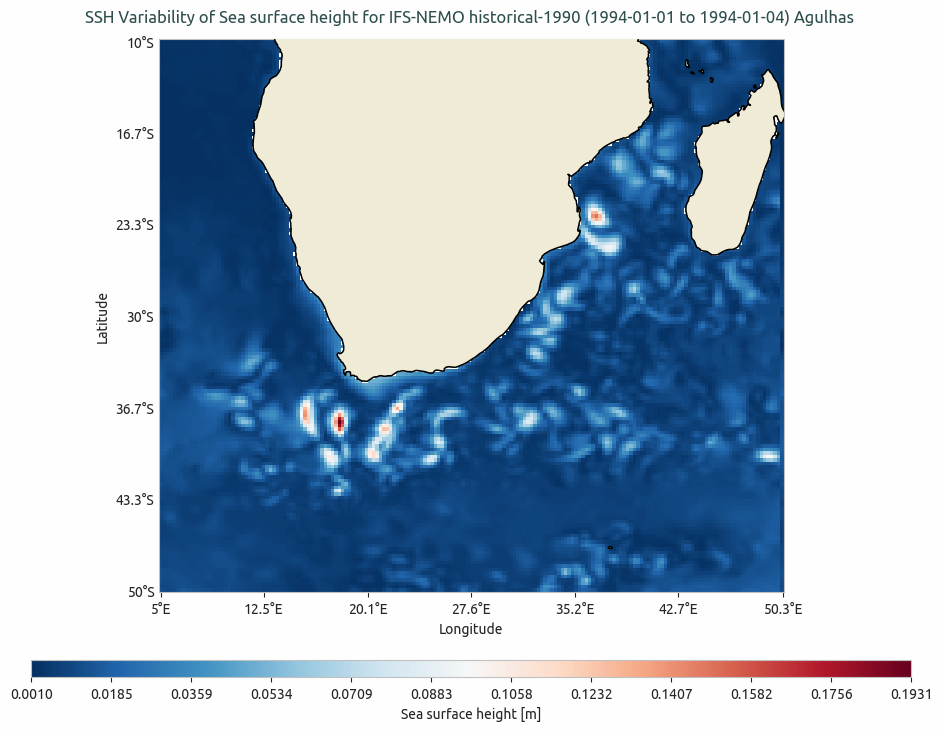

In [12]:
# Plot the sub region for model data
# It is important to choose a correct 'tgt_grid_name' so that the data aligns with land mask
sub_region_dataset = {"catalog": "climatedt-phase1", "model": "IFS-NEMO", "exp":"historical-1990", 'region': 'Agulhas', 'lon_limits': [5, 50], 'lat_limits': [-10, -50], 'proj': 'plate_carree', 'proj_params': {}, "tgt_grid_name":tgt_grid_name,}
plot_class.plot(dataset_std=ssh_dataset.data_std, **sub_region_dataset, startdate=startdate, enddate=enddate,)

2025-11-18 02:05:21 :: Regridder :: WARNING  -> No cfg_grid_dict dictionary provided, only CDO grid names can be used.
2025-11-18 02:05:21 :: Regridder :: WARNING  -> Weights block not found in the configuration file, using fallback naming scheme.


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxes: title={'center': 'SSH Variability of Absolute dynamic topography for AVISO ssh-L4 (1994-01-01 to 1994-01-04) Agulhas '}, xlabel='Longitude', ylabel='Latitude'>)

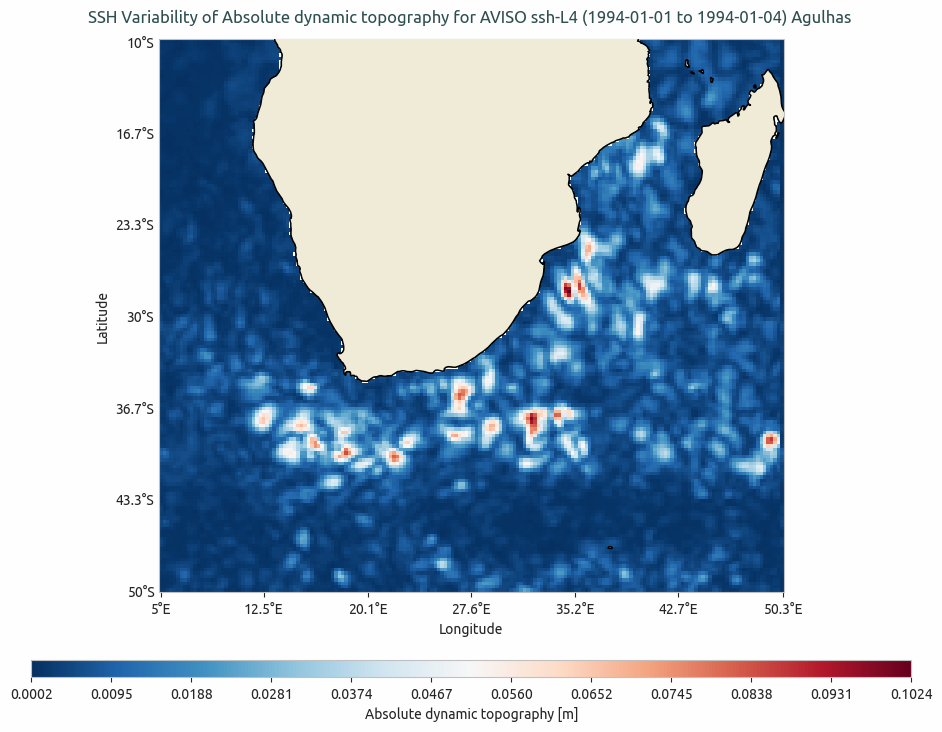

In [13]:
# Plot the sub region for Reference data
# It is important to choose a correct 'tgt_grid_name' so that the data aligns with land mask
sub_region_dataset_ref = {"catalog": "obs", "model": "AVISO", "exp":"ssh-L4", 'region': 'Agulhas', 'lon_limits': [5, 50], 'lat_limits': [-10, -50], 'proj': 'plate_carree', 'proj_params': {}, "tgt_grid_name":tgt_grid_name,}
plot_class.plot(dataset_std=ssh_dataset_ref.data_std, **sub_region_dataset_ref, startdate=startdate, enddate=enddate,)

2025-11-18 02:05:24 :: Regridder :: WARNING  -> No cfg_grid_dict dictionary provided, only CDO grid names can be used.
2025-11-18 02:05:24 :: Regridder :: WARNING  -> Weights block not found in the configuration file, using fallback naming scheme.
2025-11-18 02:05:25 :: Regridder :: WARNING  -> No cfg_grid_dict dictionary provided, only CDO grid names can be used.
2025-11-18 02:05:25 :: Regridder :: WARNING  -> Weights block not found in the configuration file, using fallback naming scheme.


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxes: title={'center': 'The difference of the SSH Variability of Sea surface height for IFS-NEMO historical-1990 (1994-01-01-1994-01-04) and, reference obs AVISO and ssh-L4 (1994-01-01-1994-01-04) Agulhas '}, xlabel='Longitude', ylabel='Latitude'>)

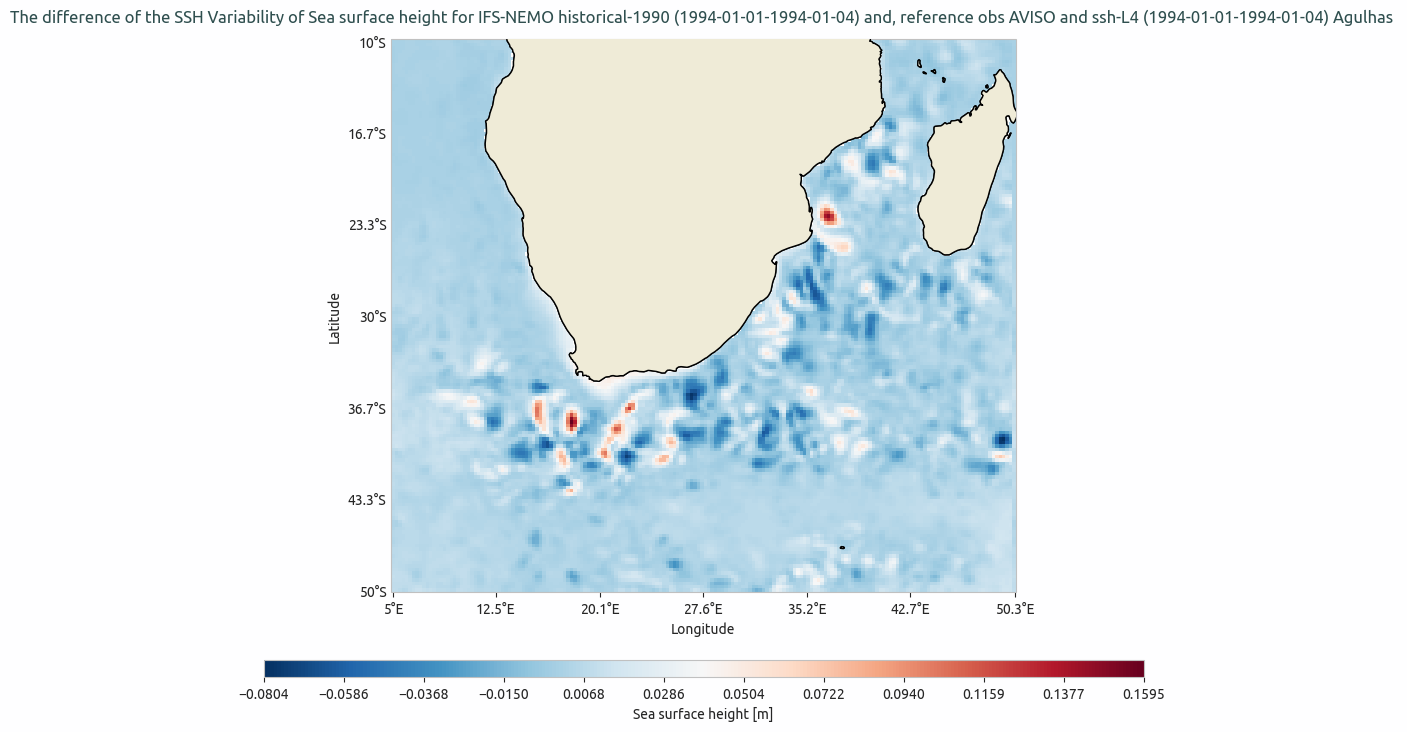

In [14]:
# Plot the diference of sub region for model dataset and reference dataset AVISO
time_intervals = {"startdate": "1994-01-01", "enddate": "1994-01-04", "startdate_ref": "1994-01-01", "enddate_ref": "1994-01-04"}
region_selection = {'region': 'Agulhas', 'lon_limits': [5, 50], 'lat_limits': [-10, -50], 'proj': 'plate_carree', 'proj_params': {},}
_dataset_ref = {"catalog_ref": "obs", "model_ref": "AVISO", "exp_ref":"ssh-L4",}
_dataset = {"catalog": "climatedt-phase1", "model": "IFS-NEMO", "exp":"historical-1990",}
plot_class.plot_diff(dataset_std=ssh_dataset.data_std, dataset_std_ref=ssh_dataset_ref.data_std, tgt_grid_name=tgt_grid_name, **_dataset, **_dataset_ref, **region_selection, **time_intervals)